In [0]:
import os
import zipfile

path_to_zip = '/home/kaggle_dataset_small.zip'
zip_ref = zipfile.ZipFile(path_to_zip, 'r')
zip_ref.extractall('/home')
zip_ref.close()

In [0]:
datadir = '/home/kaggle_dataset_small'

train_dir = datadir + '/training'
validation_dir = datadir + '/validation'

train_cats_dir = datadir + '/training/cat'
train_dogs_dir = datadir + '/training/dog'

validation_cats_dir = datadir + '/validation/cat'
validation_dogs_dir = datadir + '/validation/dog'

test_cats_dir = datadir + '/test/cat'
test_dogs_dir = datadir + '/test/dog'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
from keras.models import model_from_json

json_file = open('/home/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/home/VGG16-conv_base.h5")

loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(loaded_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(len(model.trainable_weights))
loaded_model.trainable = False
print(len(model.trainable_weights))

30
4


In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [21]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch=100,
  epochs=100,
  validation_data=validation_generator,
  validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 198ms/step - loss: 0.5830 - acc: 0.7035 - val_loss: 0.4550 - val_acc: 0.8330
Epoch 2/100
100/100 [==============================] - 17s 172ms/step - loss: 0.4860 - acc: 0.7870 - val_loss: 0.3571 - val_acc: 0.8750
Epoch 3/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4315 - acc: 0.8170 - val_loss: 0.3353 - val_acc: 0.8640
Epoch 4/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4145 - acc: 0.8235 - val_loss: 0.3144 - val_acc: 0.8700
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.3858 - acc: 0.8315 - val_loss: 0.2796 - val_acc: 0.8840
Epoch 6/100
100/100 [==============================] - 17s 170ms/step - loss: 0.3708 - acc: 0.8335 - val_loss: 0.2885 - val_acc: 0.8870
Epoch 7/100
100/100 [==============================] - 17s 169ms/step - loss: 0.3571 - acc: 0.8375 - val_loss: 0.2648 - val_acc: 0.8960
Epoch 8/100
100/100 [===========================

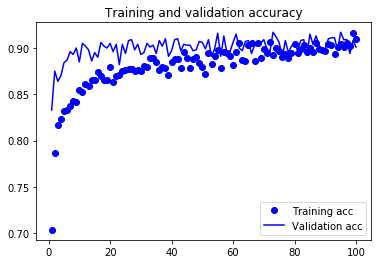

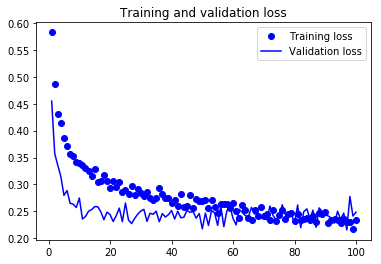

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

